# Ridge Regression

## Loading train and test data

In [25]:
#loading training data
train_data <- read.csv("Task1C_train.csv")
train_data <- scale(train_data) #scaling the data
train_label <- train_data[1:nrow(train_data),5] #creating the training labels
train_data <- train_data[1:nrow(train_data),1:4] #creating predictors


#loading testing data
test_data <- read.csv("Task1C_test.csv")
test_data <- scale(test_data) #scaling the data
test_label <- test_data[1:nrow(test_data),5] #creating the testing labels
test_data <- test_data[1:nrow(test_data),1:4] #creating predictors

In [26]:
#printing few rows
head(train_data)
head(train_label)

x1,x2,x3,x4
-1.729259,-0.8314871,-1.0209430,-0.7844105
-1.725536,-0.8520287,-1.0206420,-0.8790979
-1.721813,-0.8412684,-1.0158255,-0.8702858
-1.718090,-0.8296399,-1.0180531,-0.8505881
-1.714368,-0.8252803,-1.0092629,-0.8168945
-1.710645,-0.8138550,-0.9934286,-0.8068729


[1] -1.148323 -1.143610 -1.106215 -1.102936 -1.079782 -1.057242

In [27]:
#printing few rows
head(test_data)
head(test_label)

x1,x2,x3,x4
-1.729259,-0.8447954,-1.0144788,-0.8216982
-1.725536,-0.8379815,-1.0171199,-0.8945270
-1.721813,-0.8475725,-1.0246229,-0.8838775
-1.718090,-0.8203904,-1.0054151,-0.8098463
-1.714368,-0.8151305,-0.9977921,-0.8151711
-1.710645,-0.8220640,-0.9892686,-0.8131099


[1] -1.131671 -1.121240 -1.124921 -1.082381 -1.093630 -1.032887

## Loading Libraries

In [28]:
#load required packages
library(ggplot2) # for plotting functions.
library(reshape2) # for melting dataframes

set.seed(1234)#initialization

## Implementation of SGD and BGD algorithms 

## Auxilary functions
To produce a clean and readable code, let us first define some auxiliary function that calculate the prediction and cost based on the projected data and estimated coefficients.

In [29]:
# auxiliary function to calculate labels based on the estimated coefficients
predict_func <- function(Phi, w){
    return(Phi%*%w)
} 

# auxiliary function to calculate a cost function
error_func <- function (Phi, w, label, lambda){
    return(mean((predict_func(Phi, w) - label)^2) + .5 * lambda * w %*% w)
}

## SGD Algorithm

In [30]:
# Stochastic Gradient Descent
sgd <- function(train_data, train_label) {
    epsilon = 0.01 #termination threshold
    eta = 0.01 #learning rate
    lambda = 0.002 #regularisation parameter
    max_wt = 18 #maximum number of weight updates
    N = dim(train_data)[1] #number of training points
    tau_max = max_wt * N # Maximum number of iterations

    W <- matrix(,nrow=tau_max, ncol=ncol(train_data)) # empty matrix to store weight vector
    W[1,] <- runif(ncol(train_data)) #initializing values to parameters

    tau = 1 # counter 
    obj_func <-matrix(,nrow=tau_max, ncol=1) #creating empty matrix of objective function
    obj_func[tau,1] = error_func(train_data, W[tau,],train_label, lambda) 

    while (tau <= tau_max){

       #check termination criteria
       if (obj_func[tau,1]<=epsilon) {break}

       #shuffle data:
       train_ind <- sample(1:N, N, replace = FALSE)

       # for each datapoint
       for (i in train_ind) {
           # increment the counter
           tau <- tau + 1
           if (tau > tau_max) {break}

           # weight update
           y_pred <- predict_func(train_data[i,], W[tau-1,])
           gradient = - (train_label[i]-y_pred) * train_data[i,] + (lambda * W[tau-1,])
           W[tau,] <- W[tau-1,] - eta * gradient

           # training error
           obj_func[tau,1] = error_func(train_data, W[tau,],train_label, lambda)
       }
    }
    # resulting values for the weights and training error
    return(list('train_error' = obj_func,'W' = W))
}

## BGD Algorithm

In [31]:
# Batch Gradient Descent 
bgd <- function(train_data, train_label) {
    
    epsilon = 0.01 #termination threshold
    eta = 0.01 #learning rate
    lambda = 0.002 #regularisation parameter
    max_wt = 18 #maximum number of weight updates
    N = dim(train_data)[1] #number of training points
    N_col = dim(train_data)[2] #number of parameters
    W <- matrix(,nrow=(max_wt), ncol=ncol(train_data)) # empty matrix to store weight vector
    W[1,] <- runif(ncol(train_data))

    tau = 1 # counter 
    obj_func <-matrix(,nrow=(max_wt), ncol=1) #creating empty matrix of objective function
    obj_func[tau,1] = error_func(train_data, W[tau,],train_label, lambda) 

    for (tau in 1:(max_wt-1)){

       # check termination criteria
       if (obj_func[tau,1]<=epsilon) {break}

       # make prediction over the training set
       y_pred = predict_func(train_data, W[tau,])
       gradient = -colMeans(matrix((train_label-y_pred),nrow=N,ncol=N_col) * train_data) + (lambda * W[tau,])
       # update the weight
       W[tau+1,] = W[tau,] - eta * gradient

       # training error
       obj_func[tau+1,1] = error_func(train_data, W[tau+1,],train_label, lambda)
    } 
    # resulting values for the weights and training errors
    return(list('train_error' = obj_func,'W' = W))
}

## Implementation of SGD and BGD 

In [32]:
options(warn=-1) #to stop the warnings
sgd_w = sgd(train_data, train_label) # call sgd function
errors_sgd = sgd_w$train_error

# Adding iteration number and colnames to errors matrix of sgd
iteration <- matrix(1:nrow(errors_sgd), nrow = nrow(errors_sgd), ncol = 1)
errors_sgd <- cbind(iteration, errors_sgd)
colnames(errors_sgd) <- c('Iteration','train_error')

bgd_w = bgd(train_data, train_label) #call bgd function
errors_bgd = bgd_w$train_error

# Adding iteration number and colnames to errors matrix of bgd
iteration <- matrix(1:nrow(errors_bgd), nrow = nrow(errors_bgd), ncol = 1)
errors_bgd <- cbind(iteration*nrow(train_data), errors_bgd) # Adjusting scale of bgd iteration to match with sgd iteration
colnames(errors_bgd) <- c('Iteration','train_error')

In [33]:
#printing few rows 
head(errors_sgd)
head(errors_bgd)

Iteration,train_error
1,0.9568091
2,0.8552181
3,0.8521874
4,0.8018446
5,0.7769267
6,0.7771792


Iteration,train_error
930,0.3773967
1860,0.3510648
2790,0.3266425
3720,0.3039913
4650,0.2829827
5580,0.2634976


## Plotting training error for SGD and BGD vs number of visited data points

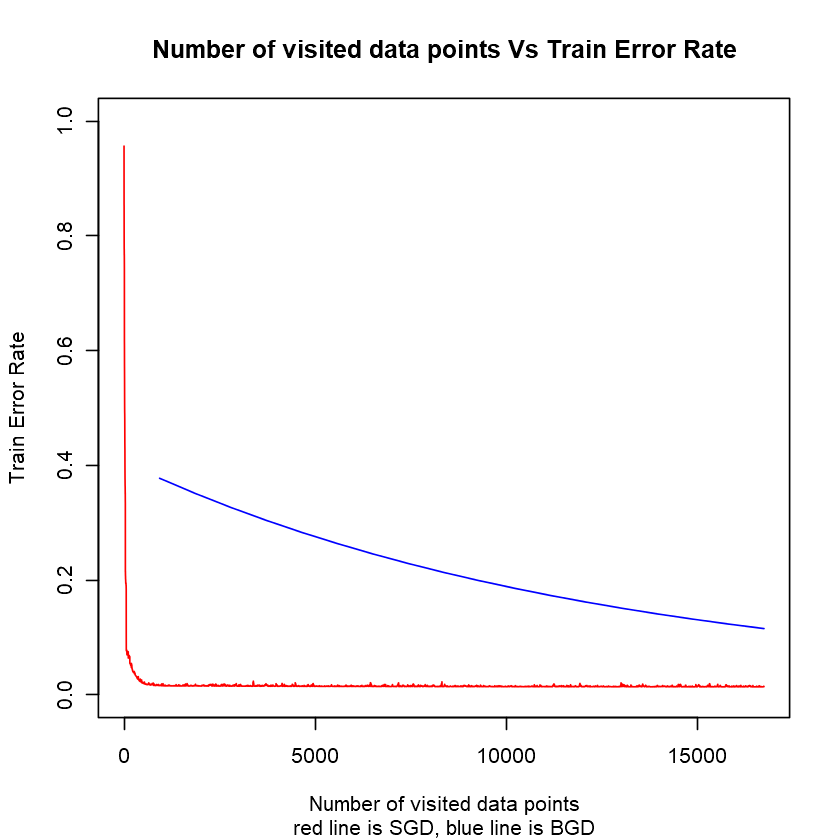

In [34]:
# Ploting train errors for SGD and BGD
plot(errors_sgd[,1], errors_sgd[,2], type="l", col="red", ylim=c(0,1), xlim=c(0,18*nrow(train_data)), 
     xlab="Number of visited data points", ylab="Train Error Rate", main = "Number of visited data points Vs Train Error Rate", 
     sub = "red line is SGD, blue line is BGD")

lines(errors_bgd[,1], errors_bgd[,2], type="l", col="blue")

## Observations

We can infer from the above plot that it confirms that SGD converges quickly when compared to BGD because it SGD needed much fewer points to converge. The error for SGD is smaller when compared to BGD. There are negligible fluctuations in SGD error when it converges to minimum error value.